# K-NN (k nearest neighbors) Implementation

In [157]:
import pandas as pd
import numpy as np
import py_scripts.tools as tools

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

PATH = './Data/'
features_file = "training_set_features.csv"
label_file = "training_set_labels.csv"
test_features_file = "test_set_features.csv"

train_feature_df = pd.read_csv(f"{PATH}{features_file}")
train_label_df = pd.read_csv(f"{PATH}{label_file}")
test_feature_df = pd.read_csv(f"{PATH}{test_features_file}")

features_names = train_feature_df.columns.drop('respondent_id')

# all columns with numerical input
features_numeric = train_feature_df.select_dtypes('number').columns.drop('respondent_id')

## Features Selection (which one we might keep or not)

In [158]:
from sklearn.ensemble import RandomForestClassifier

# X_train, X_test, y_train, y_test = train_test_split(train_feature_df.drop(columns = ['respondent_id']), train_label_df.drop(columns = ['respondent_id','seasonal_vaccine']), test_size=0.2, random_state=42)
train_feature_df_rf = train_feature_df.apply(preprocessing.LabelEncoder().fit_transform)
train_label_df_rf = train_label_df.apply(preprocessing.LabelEncoder().fit_transform)
forest = RandomForestClassifier(random_state=0)
forest.fit(train_feature_df_rf.drop(columns = ['respondent_id']), train_label_df_rf.drop(columns = ['respondent_id','seasonal_vaccine']))

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=features_names)

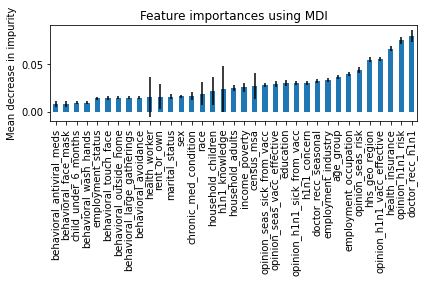

In [159]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
forest_importances.sort_values(ascending=True).plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## NaN (empty cells) replacement

In [160]:
# for each column of our dataframe, count the number of NaN (empty) cells
na_count = [(column,train_feature_df[column].isna().sum()) for column in features_names] 
print(na_count)

[('h1n1_concern', 92), ('h1n1_knowledge', 116), ('behavioral_antiviral_meds', 71), ('behavioral_avoidance', 208), ('behavioral_face_mask', 19), ('behavioral_wash_hands', 42), ('behavioral_large_gatherings', 87), ('behavioral_outside_home', 82), ('behavioral_touch_face', 128), ('doctor_recc_h1n1', 2160), ('doctor_recc_seasonal', 2160), ('chronic_med_condition', 971), ('child_under_6_months', 820), ('health_worker', 804), ('health_insurance', 12274), ('opinion_h1n1_vacc_effective', 391), ('opinion_h1n1_risk', 388), ('opinion_h1n1_sick_from_vacc', 395), ('opinion_seas_vacc_effective', 462), ('opinion_seas_risk', 514), ('opinion_seas_sick_from_vacc', 537), ('age_group', 0), ('education', 1407), ('race', 0), ('sex', 0), ('income_poverty', 4423), ('marital_status', 1408), ('rent_or_own', 2042), ('employment_status', 1463), ('hhs_geo_region', 0), ('census_msa', 0), ('household_adults', 249), ('household_children', 249), ('employment_industry', 13330), ('employment_occupation', 13470)]


In [161]:
# the variables age_group/education/race/sec/hhs_geo_region/census_msa don't have any NaN value, they will be used as a basis
# to replace other numerical NaN values
for feature in features_numeric:
    train_feature_df = tools.mean_feature_clustered(train_feature_df,feature,['age_group','race','sex','hhs_geo_region','census_msa'], True, train_feature_df)

In [162]:
# replace the NaN values of employment_industry and employment_occupation by 'not working' for the 'unemployed' and 'not in labor force' people
bool_ = (train_feature_df.employment_status == 'Not in Labor Force') | (train_feature_df.employment_status == 'Unemployed')
train_feature_df.loc[bool_, 'employment_occupation'] = 'not_working'
train_feature_df.loc[bool_, 'employment_industry'] = 'not_working'

# replace all the other NaN values by 'missing'
train_feature_df = train_feature_df.fillna('missing')

In [163]:
na_count = [(column,train_feature_df[column].isna().sum()) for column in features_names] 
print(na_count)

[('h1n1_concern', 0), ('h1n1_knowledge', 0), ('behavioral_antiviral_meds', 0), ('behavioral_avoidance', 0), ('behavioral_face_mask', 0), ('behavioral_wash_hands', 0), ('behavioral_large_gatherings', 0), ('behavioral_outside_home', 0), ('behavioral_touch_face', 0), ('doctor_recc_h1n1', 0), ('doctor_recc_seasonal', 0), ('chronic_med_condition', 0), ('child_under_6_months', 0), ('health_worker', 0), ('health_insurance', 0), ('opinion_h1n1_vacc_effective', 0), ('opinion_h1n1_risk', 0), ('opinion_h1n1_sick_from_vacc', 0), ('opinion_seas_vacc_effective', 0), ('opinion_seas_risk', 0), ('opinion_seas_sick_from_vacc', 0), ('age_group', 0), ('education', 0), ('race', 0), ('sex', 0), ('income_poverty', 0), ('marital_status', 0), ('rent_or_own', 0), ('employment_status', 0), ('hhs_geo_region', 0), ('census_msa', 0), ('household_adults', 0), ('household_children', 0), ('employment_industry', 0), ('employment_occupation', 0)]


## Ordinal Features Handling

## Categorical Features Handling (one-hot-encoding)

## Normalization & Scaling

## Model Definition

## Tests & Results